# Political Science 3 Lecture H: Descriptive Stats
Professor: Jason Wittenberg  
Author: William McEachen


### Agenda:
1) What are the types of data  
2) Analyzing data  
3) Distributions  
4) Statisitcal Inference

## Types of Data

Once we have collected data, we need to understand the data better. Common questions might include, "what is a "normal" value for this data?" or "is some of the data very different from the rest?"

Examples:   
1) Scores on your midterm (this data is generated randomly!)   
2) Presidential election outcomes by party  
3) Gay marriage approval

In [24]:
import numpy as np
from scipy import stats
from datascience import Table
import pandas as pd
from ipywidgets import *
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
class_size = 300

grade_table = Table().with_columns(
    'student id', np.random.randint(300000000, 350000000, class_size),
    'midterm grade', np.random.randint(73, 93, class_size)
)
grade_table

student id,midterm grade
324099597,87
346975729,87
310504097,90
347547736,76
344444097,88
310488322,77
342901539,76
342840602,86
335126966,78
347682551,90


In [26]:
election_table = pd.read_csv('data/pres_party.csv')
election_table

,year,political party
0,*1789*,no formally organized parties
1,*1792*,Federalist
2,*1796*,Federalist
3,*1800*,Democratic-Republican
4,*1804*,Democratic-Republican
5,*1808*,Democratic-Republican
6,*1812*,Democratic-Republican
7,*1816*,Democratic-Republican
8,*1820*,Democratic-Republican
9,*1824*,no distinct party designations


In [27]:
%matplotlib inline
ord_vals = ['Like','Like Somewhat','Neutral','Dislike Somewhat','Dislike']
np.random.choice(ord_vals, 10)
approval_table = Table().with_columns(
    'student id', np.random.randint(300000000, 350000000, 10),
    'policy approval', np.random.choice(ord_vals, 10)
)
approval_table

student id,policy approval
347795685,Dislike Somewhat
340540952,Like
347256929,Neutral
320507594,Like Somewhat
304280758,Like
334421970,Dislike Somewhat
332416628,Like Somewhat
329146971,Neutral
309384566,Neutral
322980300,Dislike Somewhat


### Measurement Metric

Different sets of data, or variables, often have different kinds of values that the data/variable can hold. In the two examples above, the "midterm grade" data can have numeric values between 70 and 90, and "political party" can be any one of the political parties in US history.

**How can we differentiate between these kinds of data?**

The *measurement metric* of a variable is the type of value the variable can take on. Variables are one of three types: *categorical*, *ordinal*, and *continuous*. Let's take a look at each of these.

### Categorical Variables
Categorical variables are variables that take on one of a finite, unordered, list of values. Above, the winning political party is a categorical variable because its values are from a finite set (Republican, Democrat, Whig, etc). Additionally, there is no ordering between these parties.

Additional examples: religious identification, dog breed, colors.

**Check Your Understanding:**
Above, would midterm grades count as a categorical variable? Why or why not?

### Ordinal Variables
Ordinal variables are variables that take on one of a finite, *ordered*, list of values. Above, the approval rating is a categorical variable because its values are from a finite set (like, dislike, neutral, etc). Additionally, there is an ordering between the values: "like" has a higher ranking than "neutral" or "dislike".

Additional examples: socioeconomic status (e.g middle class), health status ("healthy", "somewhat sick", etc).

**Check Your Understanding:**
Above, would midterm grades count as an ordinal variable? Why or why not? What about political party?

### Continuous Variables
Continuous variables are variables that take on one of a *potentially* infinite, ordered, list of values. Above, the midterm grade variable is continuous because its values are any numeric value between 70 and 90..

Additional examples: income, age, temperature.

What's the difference between continuous and ordinal variables? While it can appear that continuous and ordinal variables are the same, there is an important distinction: *equal unit difference*. For ordinal variables, the difference between each value does not have to be the same. For continuous variables, the difference must be the same. For example, if measuring socioeconomic status (an ordinal variable), the difference between "lower class" and "middle class" is not necessarily the same difference between "middle class" and "upper class". In contrast, units of age are equidistant: the difference between age 11 and 12 is the same as between 29 and 30.

**Check Your Understanding:**
Above, would approval rating count as a continuous variable? Why or why not?

## Analyzing Data

There are two ways to describe a variable: measures of *central tendency* and *variation* (or *dispersion*). 



### Central Tendency
What are typical values of the variable?

There are 3 ways of measuring central tendency: mode, mean, median.  
1) *Mode*: the value that occurs most frequently in the data  
2) *Mean*: the average value, calculated by adding all values of the variable together and dividing by the number of occurences of the variable.  
3) *Median*: the middle value, calculated by ordering all values of the variable by their rank, and choosing the value in the middle.

#### Use Cases 

**Mode:**  
Can we use mean or median for categorical variables? No! Because there is no rank system, no order, between values, we can not apply normal arithmetic operators such as addition or multiplication. Therefore, we must rely on mode for categorical variables. 

*Check Your Understanding*: What's the mode value of election_table below?

In [5]:
election_table

,year,political party
0,*1789*,no formally organized parties
1,*1792*,Federalist
2,*1796*,Federalist
3,*1800*,Democratic-Republican
4,*1804*,Democratic-Republican
5,*1808*,Democratic-Republican
6,*1812*,Democratic-Republican
7,*1816*,Democratic-Republican
8,*1820*,Democratic-Republican
9,*1824*,no distinct party designations


**Median:**  
We can use the median measurement for ordinal and continuous variables. 

How can we calculate the median value for an ordinal variable? Because ordinal variables have a ranking, we can find the middle value.

*Check Your Understanding*: What's the median value of "policy approval" below?

In [6]:
approval_table

student id,policy approval
340683563,Neutral
339525737,Like Somewhat
323178729,Dislike Somewhat
304533704,Dislike
347169873,Neutral
345191583,Neutral
307981979,Like Somewhat
346996256,Like
329802305,Like Somewhat
305440567,Dislike


**Mean:**  
We can use the mean measurement for continuous variables. For a variable $X$, its mean, $\overline{X}$, can be found thus:

$$\overline{X} = \frac{\sum_{i=1}^{n}X_i}{n}$$

*Check Your Understanding*: What's the mean value of "midterm grade" below?

In [7]:
grade_table.take[:10]

student id,midterm grade
338186811,90
321232619,73
313297766,79
337268421,89
332297487,86
336132380,77
332903418,73
315029255,84
319392350,75
348891801,79


### Using Python
Python makes calculating measures of central tendency easy!  
1) *Mode*: call <code>stats.mode()</code> on the table column of interest  
2) *Median*: call <code>np.median()</code> on the table column of interest  
3) *Mean*: call <code>np.mean()</code> on the table column of interest

In [8]:
#Mode
print("Mode: ", stats.mode(approval_table.column('policy approval')))
#Median
print("Median: ", np.median(grade_table.column('midterm grade')))
# Mean
print("Mean: ", np.mean(grade_table.column('midterm grade')))

Mode:  ModeResult(mode=array(['Like Somewhat'], dtype='<U16'), count=array([3]))
Median:  83.0
Mean:  82.60666666666667


### Variation/Dispersion
How much do the values of the variable vary? The most common measurement is the *standard deviation*, which is calculated by looking at the average difference between the average value and all actual values of the variable.
$$Standard Deviation(X) = \sqrt{(variance(X))}= \sqrt{\frac{\sum_{i=1}^{n} (X_i - \overline{X})^2}{n-1}}$$

Let's take a look at an example with the midterm scores:

In [9]:
# The values
grade_table.select('midterm grade').take[:10]

midterm grade
90
73
79
89
86
77
73
84
75
79


In [10]:
#The mean:
np.mean(grade_table.column('midterm grade'))

82.60666666666667

Given the two above, calculate the standard deviation!

### Using Python
Python makes calculating measures of variance easy!  
1) *Standard Deviation*: call <code>np.std()</code> on the table column of interest  
The above is a shorthand for the above calculation, which we can prove below:

In [11]:
grades_list = grade_table.column('midterm grade')
print(np.std(grades_list))
print(np.sqrt(np.var(grades_list)))
print(np.sqrt(sum((grades_list-np.mean(grades_list))**2)/(len(grades_list))))

5.862191474942532
5.862191474942532
5.862191474942535


Let's review each of the functions used above:  
* <code>np.std()</code>: calculate the standard deviation of a list  
* <code>np.sqrt()</code>: calculate the square root of a value  
* <code>np.var()</code>: calculate the variance of a list  
* <code>len()</code>: calculate the number of items in a list (our *n*)

## Distributions
We have covered how to calculate the key statistics for a variable. Most often, these variables represent samples of larger distributions, or sets of values. Collecting data from an entire population is expensive, and so most data sets will be limited to samples of the population. However, a problem arises from this: we normally want the statistics for the overall population, not just the sample.

For example, when determining presidential approval, surveys will create samples of 1-3,000 responses. However, we are rarely concerned with just the opinions of the survey respondents, but rather the broader American people. How can we determine the "true" statistical values for the population when we only have the sample values?

Before we start, it's important to emphasize that distributions can truly take on any form. Therefore, if we can reliably produce distributions that share the same features, we have a potentially useful tool. Let's look at some other distributions to highlight how feature consistency can be valuable:

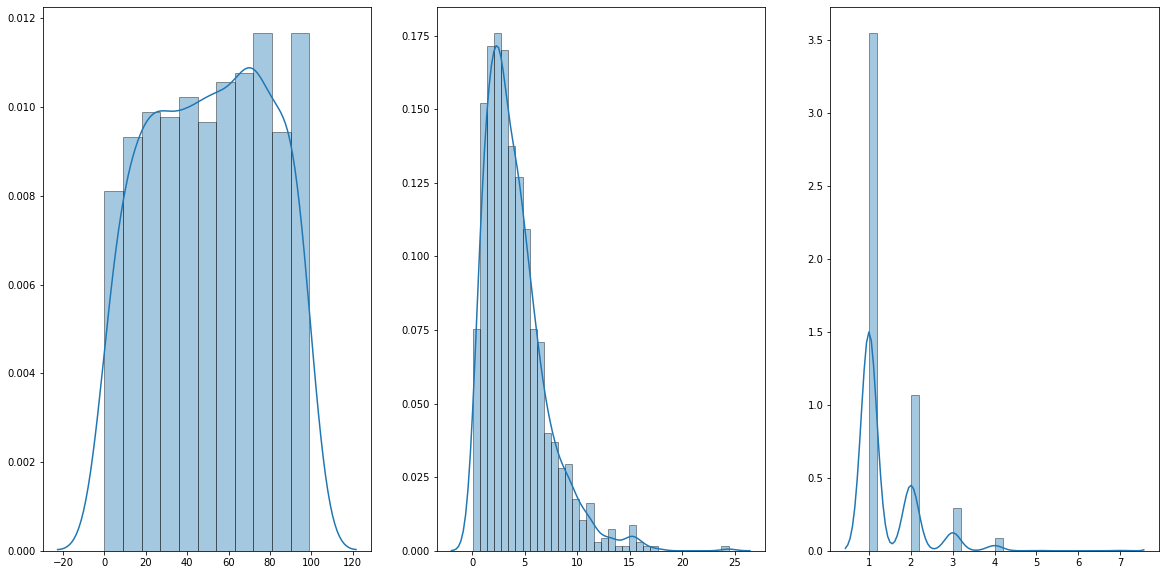

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20,10))
sns.distplot(np.random.randint(100, size=1000), ax=axs[0])
sns.distplot(np.random.gamma(2, 2, size=1000), ax=axs[1])
sns.distplot(np.random.geometric(.7, size=1000), ax=axs[2])

Before we start, we need to define a normal distribution:  
A normal distribution is a distribution of data that is *symmetrical*: its mean, median, and mode, are the same. It follows the 68-95-99 rule: 68% of the distribution lies within 1 standard deviation of the mean, 95% within 2 standard deviations, and 99% within 3 standard deviations. *Many distributions are not normal*.  

The cell below displays a normal distribution, with colored lines at the standard deviation boundaries. 


In [15]:
#Normal Distributions
def normal_dist(center, standard_dev):
    x = np.random.normal(loc=center, scale=standard_dev, size=10000)
    sns.distplot(x)
    plt.xlim(90,110)
    avg = np.mean(x)
    std_dev = np.std(x)
    std_devs = np.array([(avg - i*std_dev, avg + i*std_dev) for i in range(1,4)]).flatten()
    for index, position in np.ndenumerate(std_devs):
        index = index[0]
        color = 'y' if index > 3 else 'b' if index > 1 else 'r'
        plt.axvline(position, color=color)

interact(normal_dist, center=100, standard_dev=(1,5), continuous_update=False)

interactive(children=(IntSlider(value=100, description='center', max=300, min=-100), IntSlider(value=3, descri…

<function __main__.normal_dist(center, standard_dev)>

### Central Limit Theorem

In order to understand the central limit theorem, we start with a simple example: rolling dice. A dice roll has an equal probability of landing on each of its sides. Below, you can use the widget to simulate rolling dice between 10 and 1,000 times and view the distribution of results. 

In [16]:
#Dice rolling
faces = [1,2,3,4,5,6]
def dice_rolls(num_rolls):
    outcomes = np.random.choice(faces, num_rolls)
    sns.distplot(outcomes, kde=False, bins=6)
    print(np.mean(outcomes))
interact(dice_rolls, num_rolls=(10,1000))

interactive(children=(IntSlider(value=505, description='num_rolls', max=1000, min=10), Output()), _dom_classes…

<function __main__.dice_rolls(num_rolls)>

This is called a *uniform distribution*: each of the different outcomes (sides of the dice) have an equal chance of occuring. If the distribution isn't even, try running the cell again. What do you notice about the the distribution?

*Check Your Understanding*:  
If there is an equal likelihood for each of the sides, what is the mean outcome?  
<details><summary>Answer</summary>  
<p>
$\frac{1}{6}\sum_{i=1}^6 i =\frac{1}{6}(1)+\frac{1}{6}(2)+\frac{1}{6}(3)+\frac{1}{6}(4)+\frac{1}{6}(5)+ \frac{1}{6}(6) = 3.5$
</p>
</details>

If we rolled the dice 100 times and calculated the mean, it won't be the same as the true mean of 3.5. That's because with natural randomness, the likelihood that the outcomes are perfectly distributed is low! Above, notice how even with a large number of rolls, some sides of the die usually occurs more frequently.

*If we didn't know the underlying probability behind the outcome of the dice rolls, how can we determine what the true mean is?*

If we repeatedly rolled the dice 100 times and recorded the mean, what should we expect? Would it look like the above distribution? The cell below rolls a dice 100 times, calculates the mean, and then repeats that between 100 and 10,000 times. The histogram represents the distribution of means, not the distribution of underlying values.

In [17]:
#Dice Rolling Average
def mean_distribution(sample_size=100):
    average_values = []
    for _ in range(10000):
        faces = [1,2,3,4,5,6]
        rolls = np.random.choice(faces, sample_size)
        average_value = np.mean(rolls)
        average_values.append(average_value)
    sns.distplot(average_values)
    plt.xlim(2.5, 4.5)
interact(mean_distribution, sample_size=(1,1000), continuous_update=False)

interactive(children=(IntSlider(value=100, description='sample_size', max=1000, min=1), Output()), _dom_classe…

<function __main__.mean_distribution(sample_size=100)>

*Review*: As you increase and decrease the sample size, what do you notice about the sampling distribution?

The above distribution is centered around 3.5! The *sampling distribution*, the hypothetical distribution of sample means (dice roll average outcomes), is centered around the true population mean. This phenomenon is the basis of the Central Limit Theorem, which states that regardless of the underlying distribution of data, the sampling distribution for the data will be a normal distribution.  

The distribution of sample means will have an average equal to the population mean, and has a standard deviation equal to: $$\sigma_\overline{Y}=\frac{\sigma_Y}{\sqrt{n}}$$

The sampling distribution standard deviation is the *standard error of the mean*. We can use it to make inferences about the overall population.

### Using Python
Python makes calculating measures of variance easy!  
1) *Standard Errors*: call <code>stats.sem()</code> on the table column of interest  

## Statistical Inference

The above properties enables us to determine features of the population distribution from the sample. We'll highlight this with an example from above, the grade_table data set.

In [18]:
#A quick reminder of the data
grade_table

student id,midterm grade
338186811,90
321232619,73
313297766,79
337268421,89
332297487,86
336132380,77
332903418,73
315029255,84
319392350,75
348891801,79


This table has 300 students' scores. Suppose the class size is substantially larger (more than 5,000 students). It would be appropriate to use the standard error, the sampling distribution standard deviation, to determine the population mean.

To begin, we calculate the sample mean: $\frac{\sum_{i=1}^{n}Y_i}{n}$

In [19]:
sample_avg = np.mean(grades_list)
sample_avg

82.60666666666667

We then calculate the sample standard deviation: $\sqrt{\frac{\sum_{i=1}^{n} (Y_i - \overline{Y})^2}{n-1}}$

In [20]:
sample_std_dev = np.std(grades_list)
sample_std_dev

5.862191474942532

We know the two statistics above with certainty! They are calculated with the data we already have, and so there is no possibility that they're inaccurate. However, once we start thinking about the overall population, we will no longer have that certainty. When we begin making claims about statistical measures without all of the underlying data, we can not make firm claims, just probabilities.

With the sample standard deviation, we can calculate the standard error: $\frac{\sigma_Y}{\sqrt{n}}$

In [21]:
std_err = stats.sem(grades_list)
std_err

0.3390192864004464

With the standard error, we can begin to make claims about the overall population mean. We can create a *confidence interval* using the standard error and sample mean. Because the standard error is a measurement of the uncertainty of the population mean, by using it to create an interval around the sample mean, we can be 95% confident that the true population mean lies within this interval.

Below, we can calculate the 95% confidence interval for the population midterm grade average.

*Check Your Understanding*:  
Why are we 95% confident when we create an interval using 2(standard error)?  
<details><summary>Answer</summary>  
<p>
Because the standard error is the standard deviation for the sampling distribution, 2 standard deviations encapsulates 95% of the possible values.
</p>
</details>

95% confidence interval = $\overline{Y} \pm 2(\sigma_\overline{Y})$

In [22]:
print("95% Confidence Interval:", sample_avg-2*std_err, sample_avg + 2*std_err)

95% Confidence Interval: 81.92862809386578 83.28470523946756


Let's consider what happens to the confidence interval as we increase or decrease the sample size:

In [23]:
def calc_stats(n):
    sample_dist = [np.mean(grade_table.sample(n).column('midterm grade')) for _ in range(10000)]
    sns.distplot(sample_dist)
    dist_avg = np.mean(sample_dist)
    std_err = np.std(sample_dist)
    plt.xlim(80, 84)
    print("Sample size:", n)
    print('Standard Deviation:', np.around(np.std(sample_dist),3))
    print("Standard Error:", np.around(np.std(sample_dist), 3))
    plt.axvline(dist_avg-2*std_err, ymax=.15, color='r')
    plt.axvline(dist_avg+2*std_err, ymax=.15, color='r')
    print("95% Confidence Interval:", dist_avg-2*std_err, dist_avg + 2*std_err)
interact(calc_stats, n=(30,600), continuous_update=False)

interactive(children=(IntSlider(value=315, description='n', max=600, min=30), Output()), _dom_classes=('widget…

<function __main__.calc_stats(n)>

How does the standard error change as you increase or decrease the sample size? Why would this be the case?